In [2]:
import sys

if sys.platform == "win32":
    sys.path.append("D:/DevSpace/Projects/Research/SeizureDetection")
elif sys.platform == "linux":
    sys.path.append("/mnt/d/gniazdko/SeizureDetection")

In [3]:
from core.machine_learning.engine import SimpleNet, BCEWithLogitsLoss, BinaryAccuracy, SGD, StepLR

d:\DevSpace\Projects\Research\research_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from torchsummary import summary
import matplotlib.pyplot as plt

from core.utils import ProjectManager, ConfigManager
from core.utils import load_model_input_data

from core.machine_learning import (
    sample_data,
    split_data_by_proportions,
    create_dataloaders,
)

In [5]:
project_manager = ProjectManager()
configs_directory_path = project_manager.get_configs_directory_path()
primary_data_path = project_manager.get_primary_data_path()
model_directory_path = project_manager.get_model_data_path()

config_manager = ConfigManager(configs_directory_path)
model_params = config_manager.load_config("parameters_machine_learning")

In [6]:
model_input_data = load_model_input_data(
    primary_data_path, model_params["data_version"])

In [7]:
model_input_data = sample_data(model_input_data, fraction=1)

In [8]:
X, y = model_input_data

X.shape, y.shape

((781, 18, 128, 128), (781, 2))

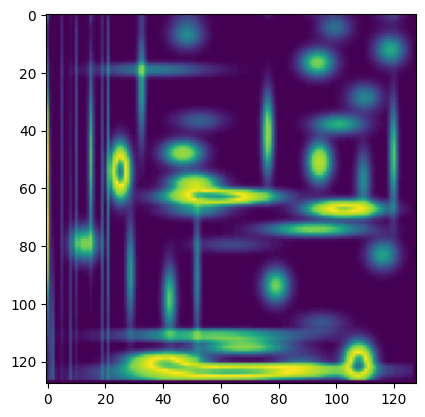

In [9]:
plt.imshow(X[213, 10, :, :]);

In [23]:
X.min(), X.max(), X.mean(), X.std()

(0.0, 0.8823529481887817, 0.06080366838638225, 0.1422678486212538)

In [12]:
X[213, 10, :, :].mean(), X[213, 10, :, :].std()

(0.15300580577763867, 0.2215764303538564)

In [13]:
X[213, 10, :, :].min(), X[213, 10, :, :].max()

(0.0, 0.8823529481887817)

In [16]:
X[213, 10, :, :].flatten().shape

(16384,)

In [10]:
data_splits = split_data_by_proportions(
    model_input_data, model_params["data_parameters"])

train_data, valid_data, test_data = create_dataloaders(
    data_splits, model_params["data_parameters"])

In [11]:
single_batch = next(iter(train_data))

features, targets = single_batch
features, targets = features.to('cuda'), targets.to('cuda')

features.shape, targets.shape

(torch.Size([16, 1, 18, 128, 128]), torch.Size([16, 2]))

In [12]:
model_parameters = model_params["model_parameters"]

In [14]:
model = SimpleNet(
    in_channels=model_parameters["in_channels"],
    num_classes=model_parameters["num_classes"],
    dropout=model_parameters["dropout"])

model = model.to(model_parameters["device"])

In [15]:
model

SimpleNet(
  (conv_net): Sequential(
    (0): Conv2Plus1D(
      (spatial_convolution): Conv2d(1, 7, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (temporal_convolution): Conv1d(7, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2Plus1D(
      (spatial_convolution): Conv2d(16, 57, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (temporal_convolution): Conv1d(57, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    )
    (5): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2Plus1D(
      (spatial_convolution): Conv2d(32, 115, kernel_size=(3, 3), stride=(1, 1), padd

In [16]:
summary(model, input_data=(1, 18, 128, 128))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 2, 16, 16]       --
|    └─Conv2Plus1D: 2-1                  [-1, 16, 18, 128, 128]    --
|    |    └─Conv2d: 3-1                  [-1, 7, 128, 128]         70
|    |    └─Conv1d: 3-2                  [-1, 16, 18]              352
|    └─BatchNorm3d: 2-2                  [-1, 16, 18, 128, 128]    32
|    └─ReLU: 2-3                         [-1, 16, 18, 128, 128]    --
|    └─MaxPool3d: 2-4                    [-1, 16, 9, 64, 64]       --
|    └─Conv2Plus1D: 2-5                  [-1, 32, 9, 64, 64]       --
|    |    └─Conv2d: 3-3                  [-1, 57, 64, 64]          8,265
|    |    └─Conv1d: 3-4                  [-1, 32, 9]               5,504
|    └─BatchNorm3d: 2-6                  [-1, 32, 9, 64, 64]       64
|    └─ReLU: 2-7                         [-1, 32, 9, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 32, 4, 32, 32]       --
|    └─C

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 64, 2, 16, 16]       --
|    └─Conv2Plus1D: 2-1                  [-1, 16, 18, 128, 128]    --
|    |    └─Conv2d: 3-1                  [-1, 7, 128, 128]         70
|    |    └─Conv1d: 3-2                  [-1, 16, 18]              352
|    └─BatchNorm3d: 2-2                  [-1, 16, 18, 128, 128]    32
|    └─ReLU: 2-3                         [-1, 16, 18, 128, 128]    --
|    └─MaxPool3d: 2-4                    [-1, 16, 9, 64, 64]       --
|    └─Conv2Plus1D: 2-5                  [-1, 32, 9, 64, 64]       --
|    |    └─Conv2d: 3-3                  [-1, 57, 64, 64]          8,265
|    |    └─Conv1d: 3-4                  [-1, 32, 9]               5,504
|    └─BatchNorm3d: 2-6                  [-1, 32, 9, 64, 64]       64
|    └─ReLU: 2-7                         [-1, 32, 9, 64, 64]       --
|    └─MaxPool3d: 2-8                    [-1, 32, 4, 32, 32]       --
|    └─C

In [20]:
loss_fn = BCEWithLogitsLoss()
accuracy_fn = BinaryAccuracy()

optimizer = SGD(
    params=model.parameters(),
    lr=model_parameters["learning_rate"],
    weight_decay=model_parameters["weight_decay"])
    
lr_scheduler = StepLR(
    optimizer,
    step_size=model_parameters["step_size"],
    gamma=model_parameters["gamma"])

In [21]:
output = model(features)
output

tensor([[ 0.2197, -0.0424],
        [ 0.2391, -0.0503],
        [ 0.2259, -0.0467],
        [ 0.2299, -0.0391],
        [ 0.2358, -0.0488],
        [ 0.2195, -0.0578],
        [ 0.2274, -0.0471],
        [ 0.2212, -0.0411],
        [ 0.2325, -0.0463],
        [ 0.2247, -0.0466],
        [ 0.2221, -0.0379],
        [ 0.2216, -0.0423],
        [ 0.2273, -0.0550],
        [ 0.2260, -0.0466],
        [ 0.2255, -0.0444],
        [ 0.2195, -0.0568]], device='cuda:0', grad_fn=<AddmmBackward0>)